In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sympy import symbols, solve

In [2]:
def C_formula(A, n):
    upper = A**(n)*n/(math.factorial(n)*(n-A))
    lower = 0
    for i in range(n):
        lower += A**(i)/math.factorial(i)
    lower += A**(n)*n/(math.factorial(n)*(n-A))
    return upper/lower

def expected_waiting_time(A, mu, n):
    return C_formula(A, n)/(mu*(n-A))

def calculate_availability(mu, lam, counters):
    p = [1]*(counters+1) #Lager liste for hver p-verdiene fra og med 2

    a = lam/mu
    consts = [1]*counters
    for i in range(counters):
        consts[i] *= a*(i+1)
    
    for i in range(counters):
        for j in range(i+1):
            # print(consts[-j])
            p[i] *= consts[-(j+1)]

    p_1 = 1/(sum(p))
    A = 1-(p_1*p[-2])
    return A
mu = 1/15
lam = 1/(4*60)
A = []
for i in range(4):
    A.append(calculate_availability(mu, lam, i+1))
A

[0.9411764705882353, 0.993103448275862, 0.9987917841320982, 0.9997189695550351]

In [9]:
mu = 1/2
lam = 1/3
A = []
T = []
for i in range(4):
    A.append(calculate_availability(mu, lam, i+1))
    print(f"counters {i+1}: {A[i]}")
    T.append(round(expected_waiting_time(lam/(mu), mu, i+1),7))

T

counters 1: 0.6
counters 2: 0.7241379310344828
counters 3: 0.7611940298507462
counters 4: 0.7726465364120781


[4.0, 0.25, 0.0278746, 0.0030418]

Text(0.5, 1.0, 'Waiting times with different amount of counters')

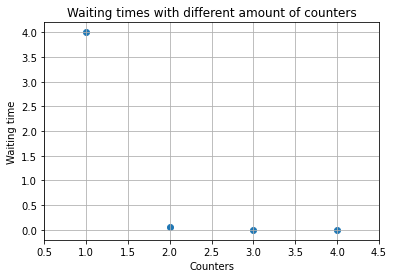

In [4]:
fig, ax = plt.subplots()
# ax.plot(range(1,5), T)
ax.scatter(range(1,5), T)
ax.grid()
ax.set_xlim((0.5, 4.5))
ax.set_xlabel('Counters')
ax.set_ylabel('Waiting time')
ax.set_title("Waiting times with different amount of counters")

In [8]:
import lab4sim as sim 

queue_times_list = []
down_time_list = []
waiting_time_and_counters = {}

A_list = []
for i in range(3*365):
    queue_times = []
    down_time = 0
    waiting_time_and_counters, queue_times, down_time, A_list = sim.simulate(queue_times_list, down_time_list,
                waiting_time_and_counters, queue_times, down_time, A_list)
    queue_times_list.append(np.array(queue_times))
    down_time_list.append(down_time)

queue_times_list = np.hstack(np.array(queue_times_list))
A_list = np.hstack(np.array(A_list))
mean, std = sim.calculate_queue_time(waiting_time_and_counters)
print(mean, std)
print(
    f'Results:\nAvailability A = {A_list.mean()}\nA std = {A_list.std()}\nMean queue time T_q = {queue_times_list.mean()}\nQueue time std={queue_times_list.std()}')


[0.15616611470489544] [2.267598629670062]
Results:
Availability A = 1.0
A std = 0.0
Mean queue time T_q = 0.15623182459914198
Queue time std=2.2692226625965306


<ipython-input-8-cebb0fc0f7cc>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  queue_times_list = np.hstack(np.array(queue_times_list))


array([1., 1., 1., ..., 1., 1., 1.])